In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [4]:
import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.0.0-beta1', '2.2.4-tf')

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

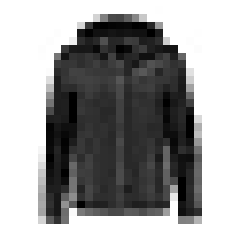

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

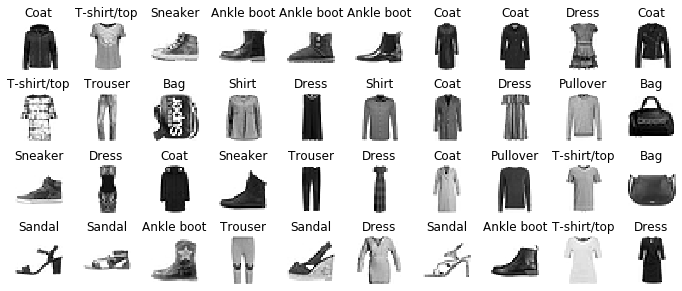

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.layers[1].name

'dense'

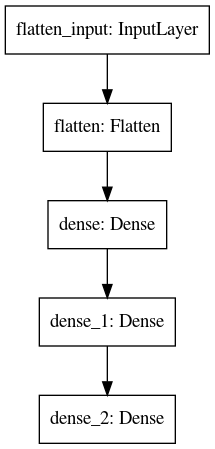

In [16]:
keras.utils.plot_model(model)

In [17]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.04836924, -0.00301779, -0.02960113, ...,  0.01255327,
         0.03751411,  0.00318331],
       [ 0.01481455,  0.06253971,  0.05794524, ...,  0.03014015,
         0.03942043,  0.07341835],
       [ 0.01159307,  0.03827588,  0.05438061, ...,  0.04510576,
         0.06978773, -0.05883701],
       ...,
       [ 0.05385295, -0.01222143,  0.06641772, ..., -0.05668993,
         0.06249912, -0.03966956],
       [ 0.02317949, -0.05119859,  0.03886479, ..., -0.01395891,
         0.01342704, -0.06548519],
       [-0.00371186, -0.03978826,  0.06928793, ...,  0.01517352,
        -0.04981206, -0.02244623]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [22]:
print("GPU available: ", tf.test.is_gpu_available())
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

W0811 20:54:36.428787 139902047606592 deprecation.py:323] From /home/joschi/anaconda3/envs/tfgpu/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


GPU available:  True
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 64us/sample - loss: 0.6999 - accuracy: 0.7711 - val_loss: 0.5171 - val_accuracy: 0.8264
Epoch 2/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4870 - accuracy: 0.8292 - val_loss: 0.4378 - val_accuracy: 0.8524
Epoch 3/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4426 - accuracy: 0.8448 - val_loss: 0.4192 - val_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4134 - accuracy: 0.8556 - val_loss: 0.4038 - val_accuracy: 0.8610
Epoch 5/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3926 - accuracy: 0.8615 - val_loss: 0.4660 - val_accuracy: 0.8276
Epoch 6/30
55000/55000 [==============================] - 3s 53us/sample - loss: 0.3786 - accuracy: 0.8668 - val_loss: 0.3822 - val_accuracy: 0.8658
Epoch 7/30
55000/55000 [============

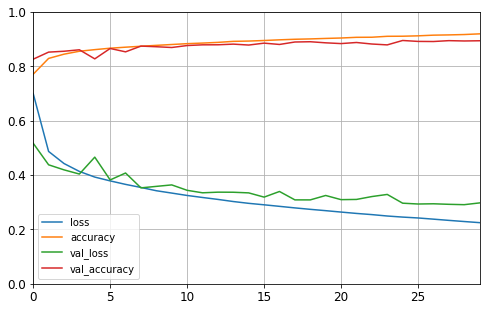

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3319 - accuracy: 0.8820


[0.3318539241433144, 0.882]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 45us/sample - loss: 1.2646 - val_loss: 0.6563
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 38us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 38us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 38us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [===========

In [31]:
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

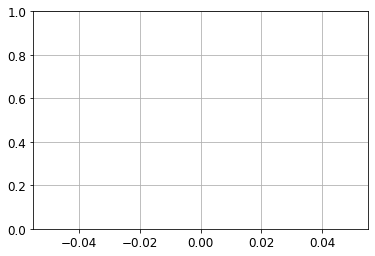

In [32]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [34]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

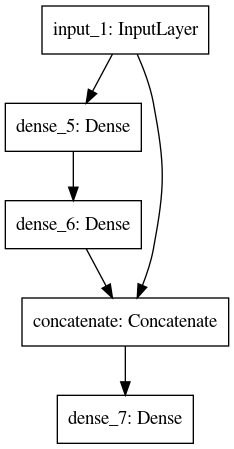

In [35]:
keras.utils.plot_model(model)

In [36]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

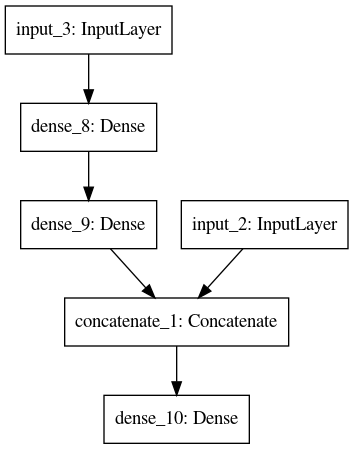

In [37]:
keras.utils.plot_model(model)

In [38]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=30,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.8316 - val_loss: 0.5014
Epoch 2/30
11610/11610 [==============================] - 1s 47us/sample - loss: 0.9013 - val_loss: 0.7760
Epoch 3/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5392 - val_loss: 0.4644
Epoch 4/30
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4477 - val_loss: 0.4353
Epoch 5/30
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4265 - val_loss: 0.4211
Epoch 6/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4136 - val_loss: 0.4027
Epoch 7/30
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4031 - val_loss: 0.3959
Epoch 8/30
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3947 - val_loss: 0.3927
Epoch 9/30
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3888 - val_l

In [39]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [40]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

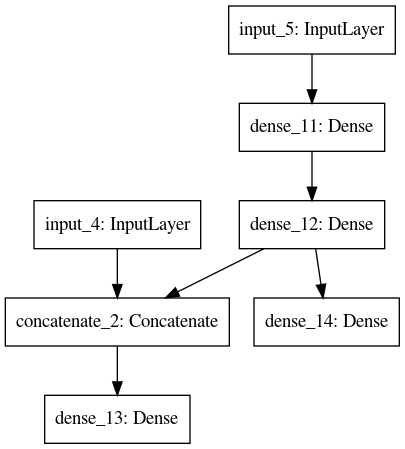

In [41]:
keras.utils.plot_model(model)

In [42]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=30,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 79us/sample - loss: 1.4906 - dense_13_loss: 1.3871 - dense_14_loss: 2.4198 - val_loss: 0.7245 - val_dense_13_loss: 0.6358 - val_dense_14_loss: 1.5246
Epoch 2/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.7562 - dense_13_loss: 0.6450 - dense_14_loss: 1.7541 - val_loss: 0.6357 - val_dense_13_loss: 0.5640 - val_dense_14_loss: 1.2800
Epoch 3/30
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6762 - dense_13_loss: 0.6116 - dense_14_loss: 1.2571 - val_loss: 0.5964 - val_dense_13_loss: 0.5382 - val_dense_14_loss: 1.1204
Epoch 4/30
11610/11610 [==============================] - 1s 64us/sample - loss: 0.7727 - dense_13_loss: 0.7219 - dense_14_loss: 1.2279 - val_loss: 0.6039 - val_dense_13_loss: 0.5553 - val_dense_14_loss: 1.0395
Epoch 5/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5599 - dense_13_loss: 0.

In [43]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 37us/sample - loss: 0.3881 - dense_13_loss: 0.3741 - dense_14_loss: 0.5051


In [44]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [45]:
y_pred_main

array([[4.1936183],
       [1.5470233],
       [1.9611716]], dtype=float32)

In [46]:
y_pred_aux

array([[3.9853854],
       [1.6616596],
       [2.006374 ]], dtype=float32)

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

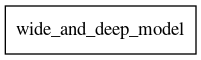

In [48]:
model = WideAndDeepModel()
keras.utils.plot_model(model)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [51]:
X_train_scaled.shape
np.isnan(np.sum(X_train_scaled))

False

In [52]:
model.compile(loss="mse", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=10, 
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.7899 - val_loss: 0.4665
Epoch 2/10
11610/11610 [==============================] - 0s 38us/sample - loss: 2.2022 - val_loss: 0.4380
Epoch 3/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4279 - val_loss: 0.4235
Epoch 4/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3875 - val_loss: 0.4125
Epoch 5/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3742 - val_loss: 0.3771
Epoch 6/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3607 - val_loss: 0.3651
Epoch 7/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3539 - val_loss: 0.3627
Epoch 8/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3478 - val_loss: 0.3572
Epoch 9/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3422 - val_l

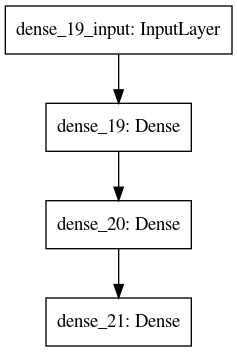

In [53]:
keras.utils.plot_model(model)

In [54]:
model.save("my_keras_model.h5")

model = keras.models.load_model("my_keras_model.h5")

In [55]:
model.predict(X_new)

array([[3.5527186],
       [1.4779649],
       [1.5871992]], dtype=float32)

In [56]:
model.save_weights("my_keras_weights.ckpt")

In [57]:
model.load_weights("my_keras_weights.ckpt")

In [58]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train_scaled, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3379
Epoch 2/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3348
Epoch 3/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3316
Epoch 4/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3291
Epoch 5/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3264
Epoch 6/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3249
Epoch 7/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3259
Epoch 8/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3224
Epoch 9/10
11610/11610 [==============================] - 0s 33us/sample - loss: 0.3203
Epoch 10/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3209


In [59]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)
history = model.fit(X_train_scaled, y_train, epochs=10, 
                   validation_data=(X_valid_scaled, y_valid), 
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")  # rollback to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3175 - val_loss: 0.3417
Epoch 2/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3149 - val_loss: 0.3340
Epoch 3/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3137 - val_loss: 0.3357
Epoch 4/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3127 - val_loss: 0.3342
Epoch 5/10
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3111 - val_loss: 0.3352
Epoch 6/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3087 - val_loss: 0.3303
Epoch 7/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3063 - val_loss: 0.3345
Epoch 8/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3037 - val_loss: 0.3267
Epoch 9/10
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3028 - val_l

In [60]:
evaluate = model.evaluate(X_valid_scaled, y_valid)

3870/3870 [==============================] - 0s 25us/sample - loss: 0.3252


In [61]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3002 - val_loss: 0.3263
Epoch 2/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3006 - val_loss: 0.3316
Epoch 3/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2976 - val_loss: 0.3350
Epoch 4/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2961 - val_loss: 0.3216
Epoch 5/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2948 - val_loss: 0.3201
Epoch 6/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2934 - val_loss: 0.3185
Epoch 7/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2987 - val_loss: 0.3200
Epoch 8/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2937 - val_loss: 0.3231
Epoch 9/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.291

In [62]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [63]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train_scaled, y_train, epochs=100,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[val_train_ratio_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
10496/11610 [==========================>...] - ETA: 0s - loss: 0.2705
val/train: 1.11
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2716 - val_loss: 0.3027
Epoch 2/100
10816/11610 [==========================>...] - ETA: 0s - loss: 0.2727
val/train: 1.11
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2723 - val_loss: 0.3031
Epoch 3/100
10688/11610 [==========================>...] - ETA: 0s - loss: 0.2673
val/train: 1.13
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2711 - val_loss: 0.3068
Epoch 4/100
10976/11610 [===========================>..] - ETA: 0s - loss: 0.2709
val/train: 1.17
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2715 - val_loss: 0.3171
Epoch 5/100
11232/11610 [============================>.] - ETA: 0s - loss: 0.2716
val/train: 1.14
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2715 

Epoch 43/100
11520/11610 [============================>.] - ETA: 0s - loss: 0.2577
val/train: 1.13
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2573 - val_loss: 0.2919
Epoch 44/100
11264/11610 [============================>.] - ETA: 0s - loss: 0.2570
val/train: 1.14
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2570 - val_loss: 0.2931
Epoch 45/100
11168/11610 [===========================>..] - ETA: 0s - loss: 0.2545
val/train: 1.15
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2554 - val_loss: 0.2949
Epoch 46/100
10816/11610 [==========================>...] - ETA: 0s - loss: 0.2525
val/train: 1.17
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2551 - val_loss: 0.2978
Epoch 47/100
10944/11610 [===========================>..] - ETA: 0s - loss: 0.2584
val/train: 1.16
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2558 - val_loss: 0.2968
Epoch 48/100
10880/11610 

In [64]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [65]:
run_logdir = get_run_logdir()

In [66]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_scaled, y_train, epochs=30, 
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2530 - val_loss: 0.2924
Epoch 2/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2525 - val_loss: 0.2928
Epoch 3/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2522 - val_loss: 0.2898
Epoch 4/30
11610/11610 [==============================] - 0s 40us/sample - loss: 0.2516 - val_loss: 0.2971
Epoch 5/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2515 - val_loss: 0.2997
Epoch 6/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2524 - val_loss: 0.2889
Epoch 7/30
11610/11610 [==============================] - 0s 39us/sample - loss: 0.2511 - val_loss: 0.2913
Epoch 8/30
11610/11610 [==============================] - 0s 42us/sample - loss: 0.2513 - val_loss: 0.3000
Epoch 9/30
11610/11610 [==============================] - 0s 41us/sample - loss: 0.2512 - val_l

In [100]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [103]:
keras_reg.fit(X_train_scaled, y_train, epochs=1000, batch_size=64,
             validation_data=(X_valid_scaled, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test_scaled, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/1000
11610/11610 [==============================] - 0s 29us/sample - loss: 1.5304 - val_loss: 0.6912
Epoch 2/1000
11610/11610 [==============================] - 0s 21us/sample - loss: 0.7550 - val_loss: 0.6328
Epoch 3/1000
11610/11610 [==============================] - 0s 21us/sample - loss: 0.6225 - val_loss: 0.5877
Epoch 4/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5766 - val_loss: 0.5597
Epoch 5/1000
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5475 - val_loss: 0.5356
Epoch 6/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5276 - val_loss: 0.5175
Epoch 7/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5109 - val_loss: 0.5038
Epoch 8/1000
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4981 - val_loss: 0.4929
Epoch 9/1000
11610/11610 [==============================] - 0s 20us/sample - lo

11610/11610 [==============================] - 0s 19us/sample - loss: 0.3911 - val_loss: 0.4014
Epoch 76/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3904 - val_loss: 0.3988
Epoch 77/1000
11610/11610 [==============================] - 0s 18us/sample - loss: 0.3896 - val_loss: 0.3977
Epoch 78/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3889 - val_loss: 0.3975
Epoch 79/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3882 - val_loss: 0.3973
Epoch 80/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3875 - val_loss: 0.3963
Epoch 81/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3868 - val_loss: 0.3958
Epoch 82/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3868 - val_loss: 0.3952
Epoch 83/1000
11610/11610 [==============================] - 0s 20us/sample - loss: 0.3857 - val_loss: 0.3948
Epoch 84/1000
11610/1161

Epoch 223/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3314 - val_loss: 0.3463
Epoch 224/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3313 - val_loss: 0.3476
Epoch 225/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3306 - val_loss: 0.3467
Epoch 226/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3305 - val_loss: 0.3515
Epoch 227/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3399 - val_loss: 0.3466
Epoch 228/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3329 - val_loss: 0.3468
Epoch 229/1000
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3310 - val_loss: 0.3461
Epoch 230/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3305 - val_loss: 0.3465
Epoch 231/1000
11610/11610 [==============================] - 0s 20us/sample - loss: 0.3296 - val_loss: 0.3453
E

Epoch 297/1000
11610/11610 [==============================] - 0s 19us/sample - loss: 0.3146 - val_loss: 0.3337
Epoch 298/1000
5160/5160 [==============================] - 0s 22us/sample - loss: 0.3436


In [104]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(1e-3, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=20, cv=3,
                                  verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=500, batch_size=32,
                 validation_data=(X_valid_scaled, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] learning_rate=0.004387096309029169, n_hidden=2, n_neurons=91 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/500
  32/7740 [..............................] - ETA: 5s - loss: 4.5358

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 0s 60us/sample - loss: 1.4145 - val_loss: 0.6180
Epoch 2/500
7740/7740 [==============================] - 0s 47us/sample - loss: 1.2099 - val_loss: 0.5908
Epoch 3/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5778 - val_loss: 0.5301
Epoch 4/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5179 - val_loss: 0.4945
Epoch 5/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4860 - val_loss: 0.4685
Epoch 6/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4648 - val_loss: 0.4530
Epoch 7/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4518 - val_loss: 0.4407
Epoch 8/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4382 - val_loss: 0.4318
Epoch 9/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4295 - val_loss: 0.4250
Epoch 10/500
7740/7740 [==============================] - 

Epoch 78/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2982 - val_loss: 0.3183
Epoch 79/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2971 - val_loss: 0.3161
Epoch 80/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.2970 - val_loss: 0.3242
Epoch 81/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2975 - val_loss: 0.3214
Epoch 82/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2968 - val_loss: 0.3163
Epoch 83/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.2996 - val_loss: 0.3172
Epoch 84/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2973 - val_loss: 0.3149
Epoch 85/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2991 - val_loss: 0.3168
Epoch 86/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3054 - val_loss: 0.3149
Epoch 87/500
7740/7740 [=============

7740/7740 [==============================] - 0s 48us/sample - loss: 0.2657 - val_loss: 0.2984
Epoch 155/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2660 - val_loss: 0.2933
Epoch 156/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.2654 - val_loss: 0.2952
Epoch 157/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.2660 - val_loss: 0.3005
Epoch 158/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.2650 - val_loss: 0.2947
Epoch 159/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.2631 - val_loss: 0.3023
Epoch 160/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.2648 - val_loss: 0.3079
Epoch 161/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.2637 - val_loss: 0.2954
Epoch 162/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.2626 - val_loss: 0.2942
Epoch 163/500
7740/7740 [=================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


7740/7740 [==============================] - 0s 62us/sample - loss: 0.9794 - val_loss: 0.6461
Epoch 2/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5871 - val_loss: 0.5482
Epoch 3/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5197 - val_loss: 0.4952
Epoch 4/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4739 - val_loss: 0.4763
Epoch 5/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4519 - val_loss: 0.4528
Epoch 6/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4378 - val_loss: 0.4453
Epoch 7/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4275 - val_loss: 0.4290
Epoch 8/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4171 - val_loss: 0.4267
Epoch 9/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4144 - val_loss: 0.4192
Epoch 10/500
7740/7740 [==============================] - 

Epoch 78/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2858 - val_loss: 0.3115
Epoch 79/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2831 - val_loss: 0.3163
Epoch 80/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.2883 - val_loss: 0.3077
Epoch 81/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2828 - val_loss: 0.3088
Epoch 82/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2818 - val_loss: 0.3084
Epoch 83/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2810 - val_loss: 0.3142
Epoch 84/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2803 - val_loss: 0.3045
Epoch 85/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2807 - val_loss: 0.3057
Epoch 86/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2794 - val_loss: 0.3230
Epoch 87/500
7740/7740 [=============

7740/7740 [==============================] - 0s 48us/sample - loss: 0.2518 - val_loss: 0.2945
Epoch 155/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2525 - val_loss: 0.3038
Epoch 156/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.2521 - val_loss: 0.2913
Epoch 157/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.2516 - val_loss: 0.2914
Epoch 158/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.2513 - val_loss: 0.2944
Epoch 159/500
3870/3870 [==============================] - 0s 20us/sample - loss: 0.6065
[CV]  learning_rate=0.004387096309029169, n_hidden=2, n_neurons=91, total= 1.0min
[CV] learning_rate=0.004387096309029169, n_hidden=2, n_neurons=91 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 0s 59us/sample - loss: 1.0590 - val_loss: 0.6108
Epoch 2/500
7740/7740 [==============================] - 0s 46us/sample - loss

Epoch 14/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5034 - val_loss: 0.5000
Epoch 15/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4977 - val_loss: 0.4943
Epoch 16/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4922 - val_loss: 0.4891
Epoch 17/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4872 - val_loss: 0.4854
Epoch 18/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4825 - val_loss: 0.4816
Epoch 19/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4784 - val_loss: 0.4770
Epoch 20/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4744 - val_loss: 0.4734
Epoch 21/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4710 - val_loss: 0.4707
Epoch 22/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4676 - val_loss: 0.4664
Epoch 23/500
7740/7740 [=============

Epoch 166/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3409 - val_loss: 0.3547
Epoch 167/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3424 - val_loss: 0.3548
Epoch 168/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3403 - val_loss: 0.3550
Epoch 169/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3401 - val_loss: 0.3539
Epoch 170/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3400 - val_loss: 0.3556
Epoch 171/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3406 - val_loss: 0.3543
Epoch 172/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3401 - val_loss: 0.3517
Epoch 173/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3386 - val_loss: 0.3518
Epoch 174/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3364 - val_loss: 0.3528
Epoch 175/500
7740/7740 [===

Epoch 242/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3114 - val_loss: 0.3333
Epoch 243/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3113 - val_loss: 0.3369
Epoch 244/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3135 - val_loss: 0.3335
Epoch 245/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3110 - val_loss: 0.3317
Epoch 246/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3102 - val_loss: 0.3330
Epoch 247/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3108 - val_loss: 0.3331
Epoch 248/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3102 - val_loss: 0.3336
Epoch 249/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3095 - val_loss: 0.3327
Epoch 250/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3095 - val_loss: 0.3320
Epoch 251/500
7740/7740 [===

Epoch 318/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2952 - val_loss: 0.3228
Epoch 319/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2946 - val_loss: 0.3209
Epoch 320/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2945 - val_loss: 0.3209
Epoch 321/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2944 - val_loss: 0.3213
Epoch 322/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2941 - val_loss: 0.3221
Epoch 323/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2933 - val_loss: 0.3226
Epoch 324/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2941 - val_loss: 0.3208
Epoch 325/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2934 - val_loss: 0.3233
Epoch 326/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2937 - val_loss: 0.3198
Epoch 327/500
7740/7740 [===

7740/7740 [==============================] - 0s 52us/sample - loss: 0.3410 - val_loss: 0.3598
Epoch 111/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3399 - val_loss: 0.3591
Epoch 112/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3403 - val_loss: 0.3591
Epoch 113/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3391 - val_loss: 0.3593
Epoch 114/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3388 - val_loss: 0.3584
Epoch 115/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3385 - val_loss: 0.3575
Epoch 116/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3378 - val_loss: 0.3573
Epoch 117/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3371 - val_loss: 0.3584
Epoch 118/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3368 - val_loss: 0.3568
Epoch 119/500
7740/7740 [=================

Epoch 186/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3097 - val_loss: 0.3377
Epoch 187/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3082 - val_loss: 0.3362
Epoch 188/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3074 - val_loss: 0.3357
Epoch 189/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3076 - val_loss: 0.3358
Epoch 190/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3070 - val_loss: 0.3371
Epoch 191/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3071 - val_loss: 0.3354
Epoch 192/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3064 - val_loss: 0.3344
Epoch 193/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3060 - val_loss: 0.3349
Epoch 194/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3056 - val_loss: 0.3371
Epoch 195/500
7740/7740 [===

Epoch 262/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2859 - val_loss: 0.3222
Epoch 263/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2882 - val_loss: 0.3221
Epoch 264/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2855 - val_loss: 0.3234
Epoch 265/500
3870/3870 [==============================] - 0s 23us/sample - loss: 0.3341
[CV]  learning_rate=0.0010450997151351185, n_hidden=2, n_neurons=61, total= 1.7min
[CV] learning_rate=0.0010450997151351185, n_hidden=2, n_neurons=61 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 1s 66us/sample - loss: 2.2975 - val_loss: 0.9087
Epoch 2/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.8298 - val_loss: 0.7630
Epoch 3/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.7193 - val_loss: 0.7099
Epoch 4/500
7740/7740 [==============================] - 0s 49us/sa

7740/7740 [==============================] - 0s 46us/sample - loss: 0.3750 - val_loss: 0.3935
Epoch 72/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3745 - val_loss: 0.3930
Epoch 73/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3726 - val_loss: 0.3936
Epoch 74/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3730 - val_loss: 0.3925
Epoch 75/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3712 - val_loss: 0.3907
Epoch 76/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3718 - val_loss: 0.3908
Epoch 77/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3692 - val_loss: 0.3893
Epoch 78/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3695 - val_loss: 0.3883
Epoch 79/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3687 - val_loss: 0.3902
Epoch 80/500
7740/7740 [==========================

Epoch 223/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3062 - val_loss: 0.3424
Epoch 224/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3059 - val_loss: 0.3410
Epoch 225/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3052 - val_loss: 0.3410
Epoch 226/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3050 - val_loss: 0.3420
Epoch 227/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3048 - val_loss: 0.3419
Epoch 228/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3042 - val_loss: 0.3425
Epoch 229/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3041 - val_loss: 0.3405
Epoch 230/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3038 - val_loss: 0.3403
Epoch 231/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3037 - val_loss: 0.3400
Epoch 232/500
7740/7740 [===

Epoch 299/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2892 - val_loss: 0.3311
Epoch 300/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2889 - val_loss: 0.3293
Epoch 301/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2889 - val_loss: 0.3301
Epoch 302/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2887 - val_loss: 0.3299
Epoch 303/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2885 - val_loss: 0.3289
Epoch 304/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2883 - val_loss: 0.3302
Epoch 305/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2884 - val_loss: 0.3304
Epoch 306/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2882 - val_loss: 0.3298
Epoch 307/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2880 - val_loss: 0.3284
Epoch 308/500
7740/7740 [===

7740/7740 [==============================] - 0s 47us/sample - loss: 0.3373 - val_loss: 0.3460
Epoch 84/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3365 - val_loss: 0.3457
Epoch 85/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3371 - val_loss: 0.4469
Epoch 86/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3500 - val_loss: 0.3438
Epoch 87/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3521 - val_loss: 0.3529
Epoch 88/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3360 - val_loss: 0.3439
Epoch 89/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3349 - val_loss: 0.3460
Epoch 90/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3411 - val_loss: 0.3453
Epoch 91/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3352 - val_loss: 0.3723
Epoch 92/500
7740/7740 [==========================

Epoch 24/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4054 - val_loss: 0.4065
Epoch 25/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3974 - val_loss: 0.4028
Epoch 26/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3934 - val_loss: 0.4027
Epoch 27/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3968 - val_loss: 0.4018
Epoch 28/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3900 - val_loss: 0.4004
Epoch 29/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3903 - val_loss: 0.3987
Epoch 30/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3870 - val_loss: 0.3972
Epoch 31/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3877 - val_loss: 0.4054
Epoch 32/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3868 - val_loss: 0.4052
Epoch 33/500
7740/7740 [=============

Epoch 176/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3066 - val_loss: 0.3274
Epoch 177/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3065 - val_loss: 0.3273
Epoch 178/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3082 - val_loss: 0.3299
Epoch 179/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3072 - val_loss: 0.3315
Epoch 180/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3056 - val_loss: 0.3281
Epoch 181/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3044 - val_loss: 0.3275
Epoch 182/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3043 - val_loss: 0.3260
Epoch 183/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3041 - val_loss: 0.3297
Epoch 184/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3036 - val_loss: 0.3279
Epoch 185/500
7740/7740 [===

7740/7740 [==============================] - 0s 51us/sample - loss: 0.2746 - val_loss: 0.3039
Epoch 32/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2730 - val_loss: 0.3095
Epoch 33/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2694 - val_loss: 0.2995
Epoch 34/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2708 - val_loss: 0.3346
Epoch 35/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2717 - val_loss: 0.3077
Epoch 36/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.2686 - val_loss: 0.2987
Epoch 37/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.2676 - val_loss: 0.2946
Epoch 38/500
7740/7740 [==============================] - 0s 56us/sample - loss: 0.2655 - val_loss: 0.3273
Epoch 39/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2654 - val_loss: 0.3128
Epoch 40/500
3870/3870 [==========================

Epoch 57/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5297 - val_loss: 0.5204
Epoch 58/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5298 - val_loss: 0.5199
Epoch 59/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5298 - val_loss: 0.5200
Epoch 60/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5296 - val_loss: 0.5190
Epoch 61/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5291 - val_loss: 0.5179
Epoch 62/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5299 - val_loss: 0.5182
Epoch 63/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5288 - val_loss: 0.5174
Epoch 64/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5293 - val_loss: 0.5174
Epoch 65/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5299 - val_loss: 0.5184
Epoch 66/500
7740/7740 [=============

7740/7740 [==============================] - 0s 40us/sample - loss: 0.5239 - val_loss: 0.5191
Epoch 48/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5240 - val_loss: 0.5189
Epoch 49/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5239 - val_loss: 0.5187
Epoch 50/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5229 - val_loss: 0.5179
Epoch 51/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5228 - val_loss: 0.5179
Epoch 52/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5220 - val_loss: 0.5195
Epoch 53/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5216 - val_loss: 0.5195
Epoch 54/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5212 - val_loss: 0.5177
Epoch 55/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5207 - val_loss: 0.5165
Epoch 56/500
7740/7740 [==========================

Epoch 47/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5056 - val_loss: 0.5159
Epoch 48/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5055 - val_loss: 0.5159
Epoch 49/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5055 - val_loss: 0.5158
Epoch 50/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5053 - val_loss: 0.5158
Epoch 51/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5053 - val_loss: 0.5155
Epoch 52/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5052 - val_loss: 0.5156
Epoch 53/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5053 - val_loss: 0.5157
Epoch 54/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5052 - val_loss: 0.5155
Epoch 55/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5051 - val_loss: 0.5154
Epoch 56/500
7740/7740 [=============

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3940 - val_loss: 0.4091
Epoch 25/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3913 - val_loss: 0.4106
Epoch 26/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3905 - val_loss: 0.4045
Epoch 27/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3892 - val_loss: 0.4042
Epoch 28/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3872 - val_loss: 0.4040
Epoch 29/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3858 - val_loss: 0.4078
Epoch 30/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3857 - val_loss: 0.4021
Epoch 31/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3829 - val_loss: 0.4111
Epoch 32/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3823 - val_loss: 0.3993
Epoch 33/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 44us/sample - loss: 0.4354 - val_loss: 0.4372
Epoch 88/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4335 - val_loss: 0.4361
Epoch 89/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4342 - val_loss: 0.4365
Epoch 90/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4318 - val_loss: 0.4351
Epoch 91/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4312 - val_loss: 0.4364
Epoch 92/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4308 - val_loss: 0.4340
Epoch 93/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4318 - val_loss: 0.4342
Epoch 94/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4306 - val_loss: 0.4330
Epoch 95/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4323 - val_loss: 0.4344
Epoch 96/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.3978 - val_loss: 0.4097
Epoch 164/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3983 - val_loss: 0.4092
Epoch 165/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3975 - val_loss: 0.4083
Epoch 166/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3972 - val_loss: 0.4082
Epoch 167/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3973 - val_loss: 0.4077
Epoch 168/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3964 - val_loss: 0.4072
Epoch 169/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3964 - val_loss: 0.4072
Epoch 170/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3960 - val_loss: 0.4069
Epoch 171/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3956 - val_loss: 0.4063
Epoch 172/500
7740/7740 [=================

Epoch 239/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3782 - val_loss: 0.3917
Epoch 240/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3782 - val_loss: 0.3913
Epoch 241/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3779 - val_loss: 0.3907
Epoch 242/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3775 - val_loss: 0.3907
Epoch 243/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3771 - val_loss: 0.3901
Epoch 244/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3773 - val_loss: 0.3903
Epoch 245/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3767 - val_loss: 0.3905
Epoch 246/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3766 - val_loss: 0.3899
Epoch 247/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3768 - val_loss: 0.3899
Epoch 248/500
7740/7740 [===

Epoch 315/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3633 - val_loss: 0.3805
Epoch 316/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3633 - val_loss: 0.3786
Epoch 317/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3627 - val_loss: 0.3790
Epoch 318/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3628 - val_loss: 0.3788
Epoch 319/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3627 - val_loss: 0.3786
Epoch 320/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3627 - val_loss: 0.3787
Epoch 321/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3626 - val_loss: 0.3797
Epoch 322/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3626 - val_loss: 0.3794
Epoch 323/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3623 - val_loss: 0.3786
Epoch 324/500
7740/7740 [===

Epoch 391/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3530 - val_loss: 0.3708
Epoch 392/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3529 - val_loss: 0.3707
Epoch 393/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3525 - val_loss: 0.3698
Epoch 394/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3523 - val_loss: 0.3708
Epoch 395/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3524 - val_loss: 0.3717
Epoch 396/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3540 - val_loss: 0.3704
Epoch 397/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3527 - val_loss: 0.3696
Epoch 398/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3518 - val_loss: 0.3700
Epoch 399/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3518 - val_loss: 0.3698
Epoch 400/500
7740/7740 [===

Epoch 467/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3441 - val_loss: 0.3624
Epoch 468/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3448 - val_loss: 0.3618
Epoch 469/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3440 - val_loss: 0.3624
Epoch 470/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3441 - val_loss: 0.3625
Epoch 471/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3438 - val_loss: 0.3618
Epoch 472/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3445 - val_loss: 0.3613
Epoch 473/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3434 - val_loss: 0.3613
Epoch 474/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3434 - val_loss: 0.3616
Epoch 475/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3433 - val_loss: 0.3609
Epoch 476/500
7740/7740 [===

7740/7740 [==============================] - 0s 48us/sample - loss: 0.3956 - val_loss: 0.4063
Epoch 117/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3954 - val_loss: 0.4059
Epoch 118/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3949 - val_loss: 0.4059
Epoch 119/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3948 - val_loss: 0.4052
Epoch 120/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3944 - val_loss: 0.4047
Epoch 121/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3942 - val_loss: 0.4043
Epoch 122/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3937 - val_loss: 0.4050
Epoch 123/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3932 - val_loss: 0.4041
Epoch 124/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3929 - val_loss: 0.4034
Epoch 125/500
7740/7740 [=================

Epoch 192/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3745 - val_loss: 0.3878
Epoch 193/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3742 - val_loss: 0.3880
Epoch 194/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3739 - val_loss: 0.3876
Epoch 195/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3739 - val_loss: 0.3872
Epoch 196/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3737 - val_loss: 0.3864
Epoch 197/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3734 - val_loss: 0.3865
Epoch 198/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3732 - val_loss: 0.3874
Epoch 199/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3729 - val_loss: 0.3862
Epoch 200/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3727 - val_loss: 0.3865
Epoch 201/500
7740/7740 [===

Epoch 268/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3611 - val_loss: 0.3758
Epoch 269/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3604 - val_loss: 0.3770
Epoch 270/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3603 - val_loss: 0.3751
Epoch 271/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3602 - val_loss: 0.3753
Epoch 272/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3601 - val_loss: 0.3748
Epoch 273/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3601 - val_loss: 0.3753
Epoch 274/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3600 - val_loss: 0.3751
Epoch 275/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3594 - val_loss: 0.3755
Epoch 276/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3596 - val_loss: 0.3749
Epoch 277/500
7740/7740 [===

Epoch 344/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3505 - val_loss: 0.3672
Epoch 345/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3518 - val_loss: 0.3676
Epoch 346/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3506 - val_loss: 0.3667
Epoch 347/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3522 - val_loss: 0.3667
Epoch 348/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3508 - val_loss: 0.3668
Epoch 349/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3508 - val_loss: 0.3659
Epoch 350/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3502 - val_loss: 0.3669
Epoch 351/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3501 - val_loss: 0.3671
Epoch 352/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3503 - val_loss: 0.3671
Epoch 353/500
7740/7740 [===

Epoch 420/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3426 - val_loss: 0.3583
Epoch 421/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3416 - val_loss: 0.3589
Epoch 422/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3413 - val_loss: 0.3590
Epoch 423/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3412 - val_loss: 0.3578
Epoch 424/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3411 - val_loss: 0.3578
Epoch 425/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3417 - val_loss: 0.3571
Epoch 426/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3412 - val_loss: 0.3575
Epoch 427/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3416 - val_loss: 0.3585
Epoch 428/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3405 - val_loss: 0.3571
Epoch 429/500
7740/7740 [===

7740/7740 [==============================] - 0s 44us/sample - loss: 0.4091 - val_loss: 0.4270
Epoch 86/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4085 - val_loss: 0.4269
Epoch 87/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4080 - val_loss: 0.4257
Epoch 88/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4072 - val_loss: 0.4256
Epoch 89/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4067 - val_loss: 0.4247
Epoch 90/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4061 - val_loss: 0.4239
Epoch 91/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4056 - val_loss: 0.4240
Epoch 92/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4050 - val_loss: 0.4228
Epoch 93/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4045 - val_loss: 0.4225
Epoch 94/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 45us/sample - loss: 0.3701 - val_loss: 0.3894
Epoch 162/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3696 - val_loss: 0.3889
Epoch 163/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3692 - val_loss: 0.3888
Epoch 164/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3688 - val_loss: 0.3887
Epoch 165/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3684 - val_loss: 0.3875
Epoch 166/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3678 - val_loss: 0.3868
Epoch 167/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3677 - val_loss: 0.3868
Epoch 168/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3671 - val_loss: 0.3862
Epoch 169/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3668 - val_loss: 0.3863
Epoch 170/500
7740/7740 [=================

Epoch 237/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3450 - val_loss: 0.3665
Epoch 238/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3449 - val_loss: 0.3664
Epoch 239/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3447 - val_loss: 0.3667
Epoch 240/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3444 - val_loss: 0.3665
Epoch 241/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3442 - val_loss: 0.3660
Epoch 242/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3441 - val_loss: 0.3657
Epoch 243/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3436 - val_loss: 0.3652
Epoch 244/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3435 - val_loss: 0.3654
Epoch 245/500
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3432 - val_loss: 0.3650
Epoch 246/500
7740/7740 [===

Epoch 313/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3294 - val_loss: 0.3548
Epoch 314/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3289 - val_loss: 0.3544
Epoch 315/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3287 - val_loss: 0.3551
Epoch 316/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3288 - val_loss: 0.3539
Epoch 317/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3287 - val_loss: 0.3546
Epoch 318/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3283 - val_loss: 0.3545
Epoch 319/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3280 - val_loss: 0.3542
Epoch 320/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3282 - val_loss: 0.3540
Epoch 321/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3279 - val_loss: 0.3535
Epoch 322/500
7740/7740 [===

Epoch 389/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3335 - val_loss: 0.3485
Epoch 390/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3303 - val_loss: 0.3480
Epoch 391/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3291 - val_loss: 0.3476
Epoch 392/500
3870/3870 [==============================] - 0s 20us/sample - loss: 0.3638
[CV]  learning_rate=0.0010811218976198044, n_hidden=1, n_neurons=28, total= 2.3min
[CV] learning_rate=0.002317134505774989, n_hidden=1, n_neurons=45 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 0s 55us/sample - loss: 1.8009 - val_loss: 0.7783
Epoch 2/500
7740/7740 [==============================] - 0s 45us/sample - loss: 1.4751 - val_loss: 0.7588
Epoch 3/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.9122 - val_loss: 0.6682
Epoch 4/500
7740/7740 [==============================] - 0s 42us/sa

7740/7740 [==============================] - 0s 46us/sample - loss: 0.3928 - val_loss: 0.3927
Epoch 72/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3922 - val_loss: 0.3930
Epoch 73/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3912 - val_loss: 0.3904
Epoch 74/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3903 - val_loss: 0.3896
Epoch 75/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3896 - val_loss: 0.3909
Epoch 76/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3887 - val_loss: 0.3889
Epoch 77/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3880 - val_loss: 0.3880
Epoch 78/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3873 - val_loss: 0.3881
Epoch 79/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3866 - val_loss: 0.3856
Epoch 80/500
7740/7740 [==========================

Epoch 223/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3324 - val_loss: 0.3440
Epoch 224/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3321 - val_loss: 0.3414
Epoch 225/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3317 - val_loss: 0.3430
Epoch 226/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3360 - val_loss: 0.3472
Epoch 227/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3356 - val_loss: 0.3424
Epoch 228/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3306 - val_loss: 0.3419
Epoch 229/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3326 - val_loss: 0.3432
Epoch 230/500
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3428 - val_loss: 0.3423
Epoch 231/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3332 - val_loss: 0.3412
Epoch 232/500
7740/7740 [===

7740/7740 [==============================] - 0s 48us/sample - loss: 0.3620 - val_loss: 0.3805
Epoch 112/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3616 - val_loss: 0.3804
Epoch 113/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3609 - val_loss: 0.3798
Epoch 114/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3603 - val_loss: 0.3792
Epoch 115/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3598 - val_loss: 0.3806
Epoch 116/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3601 - val_loss: 0.3791
Epoch 117/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3592 - val_loss: 0.3804
Epoch 118/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3591 - val_loss: 0.3782
Epoch 119/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3594 - val_loss: 0.3789
Epoch 120/500
7740/7740 [=================

Epoch 187/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3386 - val_loss: 0.3633
Epoch 188/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3387 - val_loss: 0.3609
Epoch 189/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3384 - val_loss: 0.3608
Epoch 190/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3381 - val_loss: 0.3607
Epoch 191/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3376 - val_loss: 0.3592
Epoch 192/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3374 - val_loss: 0.3604
Epoch 193/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3372 - val_loss: 0.3596
Epoch 194/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3382 - val_loss: 0.3599
Epoch 195/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3364 - val_loss: 0.3632
Epoch 196/500
7740/7740 [===

Epoch 263/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3239 - val_loss: 0.3476
Epoch 264/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3240 - val_loss: 0.3485
Epoch 265/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3237 - val_loss: 0.3466
Epoch 266/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3230 - val_loss: 0.3485
Epoch 267/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3233 - val_loss: 0.3477
Epoch 268/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3225 - val_loss: 0.3489
Epoch 269/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3232 - val_loss: 0.3471
Epoch 270/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3226 - val_loss: 0.3489
Epoch 271/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3247 - val_loss: 0.3465
Epoch 272/500
7740/7740 [===

Epoch 339/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3118 - val_loss: 0.3379
Epoch 340/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3121 - val_loss: 0.3378
Epoch 341/500
7740/7740 [==============================] - 0s 35us/sample - loss: 0.3122 - val_loss: 0.3364
Epoch 342/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3117 - val_loss: 0.3394
Epoch 343/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3116 - val_loss: 0.3354
Epoch 344/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3115 - val_loss: 0.3391
Epoch 345/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3111 - val_loss: 0.3358
Epoch 346/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3111 - val_loss: 0.3372
Epoch 347/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3109 - val_loss: 0.3358
Epoch 348/500
7740/7740 [===

7740/7740 [==============================] - 0s 41us/sample - loss: 0.3610 - val_loss: 0.3823
Epoch 95/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3605 - val_loss: 0.3813
Epoch 96/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3600 - val_loss: 0.3806
Epoch 97/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3596 - val_loss: 0.3808
Epoch 98/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3593 - val_loss: 0.3810
Epoch 99/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3586 - val_loss: 0.3819
Epoch 100/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3584 - val_loss: 0.3801
Epoch 101/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3577 - val_loss: 0.3795
Epoch 102/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3575 - val_loss: 0.3790
Epoch 103/500
7740/7740 [======================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.3343 - val_loss: 0.3631
Epoch 171/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3332 - val_loss: 0.3665
Epoch 172/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3340 - val_loss: 0.3616
Epoch 173/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3334 - val_loss: 0.3611
Epoch 174/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3332 - val_loss: 0.3614
Epoch 175/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3329 - val_loss: 0.3619
Epoch 176/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3327 - val_loss: 0.3611
Epoch 177/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3323 - val_loss: 0.3604
Epoch 178/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3322 - val_loss: 0.3602
Epoch 179/500
7740/7740 [=================

Epoch 246/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3155 - val_loss: 0.3486
Epoch 247/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3155 - val_loss: 0.3484
Epoch 248/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3155 - val_loss: 0.3479
Epoch 249/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3148 - val_loss: 0.3472
Epoch 250/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3149 - val_loss: 0.3482
Epoch 251/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3147 - val_loss: 0.3472
Epoch 252/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3143 - val_loss: 0.3481
Epoch 253/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3137 - val_loss: 0.3480
Epoch 254/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3134 - val_loss: 0.3494
Epoch 255/500
7740/7740 [===

7740/7740 [==============================] - 0s 42us/sample - loss: 0.4621 - val_loss: 0.4542
Epoch 103/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4618 - val_loss: 0.4536
Epoch 104/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4622 - val_loss: 0.4545
Epoch 105/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4611 - val_loss: 0.4536
Epoch 106/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4609 - val_loss: 0.4530
Epoch 107/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4606 - val_loss: 0.4525
Epoch 108/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4605 - val_loss: 0.4531
Epoch 109/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4598 - val_loss: 0.4521
Epoch 110/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4597 - val_loss: 0.4526
Epoch 111/500
7740/7740 [=================

Epoch 178/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4409 - val_loss: 0.4367
Epoch 179/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4405 - val_loss: 0.4364
Epoch 180/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4400 - val_loss: 0.4365
Epoch 181/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4407 - val_loss: 0.4374
Epoch 182/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4402 - val_loss: 0.4358
Epoch 183/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4394 - val_loss: 0.4357
Epoch 184/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4400 - val_loss: 0.4354
Epoch 185/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4389 - val_loss: 0.4350
Epoch 186/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4396 - val_loss: 0.4348
Epoch 187/500
7740/7740 [===

Epoch 254/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4285 - val_loss: 0.4260
Epoch 255/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4281 - val_loss: 0.4275
Epoch 256/500
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4277 - val_loss: 0.4257
Epoch 257/500
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4278 - val_loss: 0.4260
Epoch 258/500
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4267 - val_loss: 0.4253
Epoch 259/500
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4288 - val_loss: 0.4270
Epoch 260/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4271 - val_loss: 0.4257
Epoch 261/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4263 - val_loss: 0.4244
Epoch 262/500
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4272 - val_loss: 0.4252
Epoch 263/500
7740/7740 [===

7740/7740 [==============================] - 0s 40us/sample - loss: 0.4455 - val_loss: 0.4454
Epoch 82/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4452 - val_loss: 0.4447
Epoch 83/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4445 - val_loss: 0.4461
Epoch 84/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4440 - val_loss: 0.4440
Epoch 85/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4436 - val_loss: 0.4440
Epoch 86/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4427 - val_loss: 0.4427
Epoch 87/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4426 - val_loss: 0.4426
Epoch 88/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4416 - val_loss: 0.4420
Epoch 89/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4417 - val_loss: 0.4414
Epoch 90/500
7740/7740 [==========================

Epoch 233/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4042 - val_loss: 0.4089
Epoch 234/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4040 - val_loss: 0.4092
Epoch 235/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4036 - val_loss: 0.4093
Epoch 236/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4041 - val_loss: 0.4086
Epoch 237/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4035 - val_loss: 0.4086
Epoch 238/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4035 - val_loss: 0.4086
Epoch 239/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4033 - val_loss: 0.4082
Epoch 240/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4033 - val_loss: 0.4079
Epoch 241/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4032 - val_loss: 0.4090
Epoch 242/500
7740/7740 [===

Epoch 309/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3994 - val_loss: 0.4050
Epoch 310/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3994 - val_loss: 0.4050
Epoch 311/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3997 - val_loss: 0.4058
Epoch 312/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3995 - val_loss: 0.4052
Epoch 313/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3993 - val_loss: 0.4056
Epoch 314/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3992 - val_loss: 0.4058
Epoch 315/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3989 - val_loss: 0.4054
Epoch 316/500
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3991 - val_loss: 0.4053
Epoch 317/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3991 - val_loss: 0.4046
Epoch 318/500
7740/7740 [===

Epoch 53/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4681 - val_loss: 0.4784
Epoch 54/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4672 - val_loss: 0.4773
Epoch 55/500
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4681 - val_loss: 0.4773
Epoch 56/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4660 - val_loss: 0.4763
Epoch 57/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4669 - val_loss: 0.4769
Epoch 58/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4655 - val_loss: 0.4756
Epoch 59/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4651 - val_loss: 0.4761
Epoch 60/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4644 - val_loss: 0.4750
Epoch 61/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4640 - val_loss: 0.4742
Epoch 62/500
7740/7740 [=============

Epoch 205/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4043 - val_loss: 0.4173
Epoch 206/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4038 - val_loss: 0.4172
Epoch 207/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4035 - val_loss: 0.4170
Epoch 208/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4029 - val_loss: 0.4164
Epoch 209/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4027 - val_loss: 0.4164
Epoch 210/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4022 - val_loss: 0.4161
Epoch 211/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4021 - val_loss: 0.4152
Epoch 212/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4014 - val_loss: 0.4148
Epoch 213/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4015 - val_loss: 0.4156
Epoch 214/500
7740/7740 [===

Epoch 281/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3828 - val_loss: 0.4014
Epoch 282/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3825 - val_loss: 0.4007
Epoch 283/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3825 - val_loss: 0.4022
Epoch 284/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3824 - val_loss: 0.4022
Epoch 285/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3821 - val_loss: 0.4017
Epoch 286/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3820 - val_loss: 0.4013
Epoch 287/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3817 - val_loss: 0.4007
Epoch 288/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3817 - val_loss: 0.4008
Epoch 289/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3814 - val_loss: 0.4010
Epoch 290/500
7740/7740 [===

Epoch 357/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3730 - val_loss: 0.3951
Epoch 358/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3729 - val_loss: 0.3947
Epoch 359/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3728 - val_loss: 0.3946
Epoch 360/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3728 - val_loss: 0.3947
Epoch 361/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3726 - val_loss: 0.3945
Epoch 362/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3725 - val_loss: 0.3947
Epoch 363/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3725 - val_loss: 0.3942
Epoch 364/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3724 - val_loss: 0.3949
Epoch 365/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3723 - val_loss: 0.3939
Epoch 366/500
7740/7740 [===

7740/7740 [==============================] - 0s 52us/sample - loss: 0.3096 - val_loss: 0.3257
Epoch 26/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3108 - val_loss: 0.3205
Epoch 27/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3078 - val_loss: 0.3176
Epoch 28/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3044 - val_loss: 0.3249
Epoch 29/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3022 - val_loss: 0.3203
Epoch 30/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3016 - val_loss: 0.3218
Epoch 31/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3032 - val_loss: 0.3117
Epoch 32/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2993 - val_loss: 0.3110
Epoch 33/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2995 - val_loss: 0.3136
Epoch 34/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 54us/sample - loss: 0.3339 - val_loss: 0.3442
Epoch 72/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3326 - val_loss: 0.3444
Epoch 73/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3315 - val_loss: 0.3422
Epoch 74/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3291 - val_loss: 0.3478
Epoch 75/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3295 - val_loss: 0.3420
Epoch 76/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3275 - val_loss: 0.3396
Epoch 77/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3275 - val_loss: 0.3461
Epoch 78/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3261 - val_loss: 0.3388
Epoch 79/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3252 - val_loss: 0.3409
Epoch 80/500
7740/7740 [==========================

Epoch 223/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2608 - val_loss: 0.2945
Epoch 224/500
7740/7740 [==============================] - 0s 56us/sample - loss: 0.2605 - val_loss: 0.2967
Epoch 225/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.2602 - val_loss: 0.2961
Epoch 226/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.2596 - val_loss: 0.2944
Epoch 227/500
3870/3870 [==============================] - 0s 24us/sample - loss: 0.2766
[CV]  learning_rate=0.0015923781441655972, n_hidden=3, n_neurons=75, total= 1.6min
[CV] learning_rate=0.0015923781441655972, n_hidden=3, n_neurons=75 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 1s 73us/sample - loss: 1.7208 - val_loss: 0.7242
Epoch 2/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6715 - val_loss: 0.6283
Epoch 3/500
7740/7740 [==============================] - 0s 54us/

7740/7740 [==============================] - 0s 54us/sample - loss: 0.3297 - val_loss: 0.3528
Epoch 71/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3287 - val_loss: 0.3523
Epoch 72/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3272 - val_loss: 0.3500
Epoch 73/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3268 - val_loss: 0.3490
Epoch 74/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3258 - val_loss: 0.3477
Epoch 75/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3249 - val_loss: 0.3587
Epoch 76/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3238 - val_loss: 0.3475
Epoch 77/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3226 - val_loss: 0.3465
Epoch 78/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3223 - val_loss: 0.3461
Epoch 79/500
7740/7740 [==========================

Epoch 222/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2558 - val_loss: 0.3020
Epoch 223/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.2554 - val_loss: 0.2996
Epoch 224/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2546 - val_loss: 0.2993
Epoch 225/500
7740/7740 [==============================] - 0s 56us/sample - loss: 0.2538 - val_loss: 0.3103
Epoch 226/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.2536 - val_loss: 0.2994
Epoch 227/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2545 - val_loss: 0.3032
Epoch 228/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.2536 - val_loss: 0.3046
Epoch 229/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2537 - val_loss: 0.2990
Epoch 230/500
7740/7740 [==============================] - 0s 56us/sample - loss: 0.2543 - val_loss: 0.2981
Epoch 231/500
7740/7740 [===

Epoch 51/500
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3399 - val_loss: 0.3686
Epoch 52/500
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3390 - val_loss: 0.3622
Epoch 53/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3365 - val_loss: 0.3609
Epoch 54/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3363 - val_loss: 0.3590
Epoch 55/500
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3347 - val_loss: 0.3608
Epoch 56/500
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3340 - val_loss: 0.3584
Epoch 57/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3326 - val_loss: 0.3570
Epoch 58/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3299 - val_loss: 0.3586
Epoch 59/500
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3304 - val_loss: 0.3556
Epoch 60/500
7740/7740 [=============

Epoch 203/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2543 - val_loss: 0.3087
Epoch 204/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2555 - val_loss: 0.3068
Epoch 205/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2554 - val_loss: 0.3096
Epoch 206/500
7740/7740 [==============================] - 0s 54us/sample - loss: 0.2545 - val_loss: 0.3069
Epoch 207/500
7740/7740 [==============================] - 0s 58us/sample - loss: 0.2547 - val_loss: 0.3107
Epoch 208/500
7740/7740 [==============================] - 0s 56us/sample - loss: 0.2540 - val_loss: 0.3099
Epoch 209/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.2545 - val_loss: 0.3105
Epoch 210/500
7740/7740 [==============================] - 0s 58us/sample - loss: 0.2543 - val_loss: 0.3079
Epoch 211/500
7740/7740 [==============================] - 0s 60us/sample - loss: 0.2532 - val_loss: 0.3101
Epoch 212/500
7740/7740 [===

Epoch 63/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3714 - val_loss: 0.3717
Epoch 64/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3678 - val_loss: 0.3723
Epoch 65/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3643 - val_loss: 0.3732
Epoch 66/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3638 - val_loss: 0.3735
Epoch 67/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3637 - val_loss: 0.3694
Epoch 68/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3636 - val_loss: 0.3698
Epoch 69/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3622 - val_loss: 0.3729
Epoch 70/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3621 - val_loss: 0.3913
Epoch 71/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4549 - val_loss: 0.3713
Epoch 72/500
7740/7740 [=============

7740/7740 [==============================] - 0s 48us/sample - loss: 0.4285 - val_loss: 0.4261
Epoch 21/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4222 - val_loss: 0.4219
Epoch 22/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4145 - val_loss: 0.4198
Epoch 23/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4122 - val_loss: 0.4164
Epoch 24/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4095 - val_loss: 0.4149
Epoch 25/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4077 - val_loss: 0.4125
Epoch 26/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4048 - val_loss: 0.4107
Epoch 27/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4064 - val_loss: 0.4102
Epoch 28/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4039 - val_loss: 0.4116
Epoch 29/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 43us/sample - loss: 0.3188 - val_loss: 0.3321
Epoch 173/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3119 - val_loss: 0.3405
Epoch 174/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3119 - val_loss: 0.3331
Epoch 175/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3078 - val_loss: 0.3301
Epoch 176/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3078 - val_loss: 0.3311
Epoch 177/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3179 - val_loss: 0.3281
Epoch 178/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3094 - val_loss: 0.3307
Epoch 179/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3065 - val_loss: 0.3312
Epoch 180/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3090 - val_loss: 0.3355
Epoch 181/500
7740/7740 [=================

Epoch 44/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3601 - val_loss: 0.3798
Epoch 45/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3582 - val_loss: 0.3778
Epoch 46/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3576 - val_loss: 0.3808
Epoch 47/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3577 - val_loss: 0.3765
Epoch 48/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3567 - val_loss: 0.3771
Epoch 49/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3561 - val_loss: 0.3757
Epoch 50/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3544 - val_loss: 0.3758
Epoch 51/500
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3548 - val_loss: 0.3738
Epoch 52/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3534 - val_loss: 0.3733
Epoch 53/500
7740/7740 [=============

Epoch 196/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.2994 - val_loss: 0.3343
Epoch 197/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2978 - val_loss: 0.3414
Epoch 198/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2977 - val_loss: 0.3349
Epoch 199/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2982 - val_loss: 0.3348
Epoch 200/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2977 - val_loss: 0.3344
Epoch 201/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.2974 - val_loss: 0.3353
Epoch 202/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.2990 - val_loss: 0.3350
Epoch 203/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2968 - val_loss: 0.3381
Epoch 204/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2982 - val_loss: 0.3333
Epoch 205/500
7740/7740 [===

Epoch 22/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5166 - val_loss: 0.5059
Epoch 23/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5171 - val_loss: 0.5061
Epoch 24/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5149 - val_loss: 0.5060
Epoch 25/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5183 - val_loss: 0.5075
Epoch 26/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5161 - val_loss: 0.5074
Epoch 27/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5118 - val_loss: 0.5052
Epoch 28/500
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5105 - val_loss: 0.5245
Epoch 29/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5175 - val_loss: 0.5058
Epoch 30/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5142 - val_loss: 0.5044
Epoch 31/500
7740/7740 [=============

Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 0s 56us/sample - loss: 1.0357 - val_loss: 0.6704
Epoch 2/500
7740/7740 [==============================] - 0s 44us/sample - loss: 1.2305 - val_loss: 0.5665
Epoch 3/500
7740/7740 [==============================] - 0s 43us/sample - loss: 1.8241 - val_loss: 0.4816
Epoch 4/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5393 - val_loss: 0.4497
Epoch 5/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5365 - val_loss: 0.4304
Epoch 6/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4419 - val_loss: 0.4069
Epoch 7/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3965 - val_loss: 0.3935
Epoch 8/500
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4001 - val_loss: 0.3858
Epoch 9/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3831 - val_loss: 0.380

Epoch 24/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3805 - val_loss: 0.3975
Epoch 25/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3765 - val_loss: 0.3889
Epoch 26/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3739 - val_loss: 0.3885
Epoch 27/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3746 - val_loss: 0.3869
Epoch 28/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3756 - val_loss: 0.3841
Epoch 29/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3686 - val_loss: 0.3832
Epoch 30/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3668 - val_loss: 0.3830
Epoch 31/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3670 - val_loss: 0.3785
Epoch 32/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3710 - val_loss: 0.3801
Epoch 33/500
7740/7740 [=============

7740/7740 [==============================] - 0s 56us/sample - loss: 0.3310 - val_loss: 0.3642
Epoch 20/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3323 - val_loss: 0.3613
Epoch 21/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3297 - val_loss: 0.3648
Epoch 22/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3290 - val_loss: 0.3632
Epoch 23/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3274 - val_loss: 0.3609
Epoch 24/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3267 - val_loss: 0.3646
Epoch 25/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3280 - val_loss: 0.3640
Epoch 26/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3261 - val_loss: 0.3556
Epoch 27/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3248 - val_loss: 0.3597
Epoch 28/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3550 - val_loss: 0.3655
Epoch 51/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3710 - val_loss: 0.3662
Epoch 52/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3471 - val_loss: 0.3608
Epoch 53/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3455 - val_loss: 0.3658
Epoch 54/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3425 - val_loss: 0.3586
Epoch 55/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3479 - val_loss: 0.3604
Epoch 56/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3445 - val_loss: 0.3612
Epoch 57/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3401 - val_loss: 0.3589
Epoch 58/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3410 - val_loss: 0.3548
Epoch 59/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 52us/sample - loss: 0.3399 - val_loss: 0.3473
Epoch 22/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3382 - val_loss: 0.3458
Epoch 23/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3371 - val_loss: 0.3465
Epoch 24/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3336 - val_loss: 0.3356
Epoch 25/500
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3317 - val_loss: 0.3367
Epoch 26/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3291 - val_loss: 0.3311
Epoch 27/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3269 - val_loss: 0.3408
Epoch 28/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3246 - val_loss: 0.3351
Epoch 29/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3236 - val_loss: 0.3427
Epoch 30/500
7740/7740 [==========================

Epoch 45/500
7740/7740 [==============================] - 0s 64us/sample - loss: 0.2926 - val_loss: 0.3286
Epoch 46/500
7740/7740 [==============================] - 1s 67us/sample - loss: 0.2928 - val_loss: 0.3149
Epoch 47/500
7740/7740 [==============================] - 0s 63us/sample - loss: 0.2906 - val_loss: 0.3177
Epoch 48/500
7740/7740 [==============================] - 0s 59us/sample - loss: 0.2905 - val_loss: 0.3512
Epoch 49/500
7740/7740 [==============================] - 0s 59us/sample - loss: 0.2908 - val_loss: 0.3167
Epoch 50/500
7740/7740 [==============================] - 0s 60us/sample - loss: 0.2862 - val_loss: 0.3138
Epoch 51/500
7740/7740 [==============================] - 0s 59us/sample - loss: 0.2866 - val_loss: 0.3123
Epoch 52/500
7740/7740 [==============================] - 0s 57us/sample - loss: 0.2839 - val_loss: 0.3077
Epoch 53/500
7740/7740 [==============================] - 0s 53us/sample - loss: 0.2830 - val_loss: 0.3327
Epoch 54/500
7740/7740 [=============

7740/7740 [==============================] - 0s 51us/sample - loss: 0.2828 - val_loss: 0.3238
Epoch 33/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2827 - val_loss: 0.3226
Epoch 34/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2815 - val_loss: 0.3172
Epoch 35/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2800 - val_loss: 0.3290
Epoch 36/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2794 - val_loss: 0.3204
Epoch 37/500
7740/7740 [==============================] - 0s 52us/sample - loss: 0.2776 - val_loss: 0.3242
Epoch 38/500
7740/7740 [==============================] - 0s 50us/sample - loss: 0.2772 - val_loss: 0.3172
Epoch 39/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2749 - val_loss: 0.3110
Epoch 40/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.2731 - val_loss: 0.3298
Epoch 41/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 44us/sample - loss: 0.4345 - val_loss: 0.4176
Epoch 15/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4082 - val_loss: 0.4188
Epoch 16/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4048 - val_loss: 0.4093
Epoch 17/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4137 - val_loss: 0.4119
Epoch 18/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4106 - val_loss: 0.4071
Epoch 19/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3984 - val_loss: 0.4052
Epoch 20/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3968 - val_loss: 0.4008
Epoch 21/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4027 - val_loss: 0.4002
Epoch 22/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3910 - val_loss: 0.4146
Epoch 23/500
7740/7740 [==========================

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3234 - val_loss: 0.3649
Epoch 47/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3240 - val_loss: 0.3640
Epoch 48/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3239 - val_loss: 0.3659
Epoch 49/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3231 - val_loss: 0.3590
Epoch 50/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3220 - val_loss: 0.3622
Epoch 51/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3197 - val_loss: 0.3732
Epoch 52/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3197 - val_loss: 0.3674
Epoch 53/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3201 - val_loss: 0.3640
Epoch 54/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3231 - val_loss: 0.3723
Epoch 55/500
7740/7740 [==========================

Epoch 41/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3779 - val_loss: 0.3768
Epoch 42/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3771 - val_loss: 0.3772
Epoch 43/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3753 - val_loss: 0.3756
Epoch 44/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3748 - val_loss: 0.3762
Epoch 45/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3765 - val_loss: 0.3776
Epoch 46/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3744 - val_loss: 0.3756
Epoch 47/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3738 - val_loss: 0.3764
Epoch 48/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3716 - val_loss: 0.3739
Epoch 49/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3722 - val_loss: 0.3742
Epoch 50/500
7740/7740 [=============

Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 0s 55us/sample - loss: 1.2690 - val_loss: 0.6659
Epoch 2/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6188 - val_loss: 0.5827
Epoch 3/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5526 - val_loss: 0.5399
Epoch 4/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5161 - val_loss: 0.5699
Epoch 5/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4988 - val_loss: 0.4845
Epoch 6/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4815 - val_loss: 0.4719
Epoch 7/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4642 - val_loss: 0.4607
Epoch 8/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4544 - val_loss: 0.4562
Epoch 9/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4511 - val_loss: 0.450

7740/7740 [==============================] - 0s 48us/sample - loss: 0.3236 - val_loss: 0.3432
Epoch 154/500
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3215 - val_loss: 0.3454
Epoch 155/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3219 - val_loss: 0.3467
Epoch 156/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3200 - val_loss: 0.3428
Epoch 157/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3196 - val_loss: 0.3423
Epoch 158/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3192 - val_loss: 0.3431
Epoch 159/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3179 - val_loss: 0.3432
Epoch 160/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3188 - val_loss: 0.3439
Epoch 161/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3211 - val_loss: 0.3417
Epoch 162/500
7740/7740 [=================

Train on 7740 samples, validate on 3870 samples
Epoch 1/500
7740/7740 [==============================] - 0s 53us/sample - loss: 1.2573 - val_loss: 0.6453
Epoch 2/500
7740/7740 [==============================] - 0s 43us/sample - loss: 1.2396 - val_loss: 0.7164
Epoch 3/500
7740/7740 [==============================] - 0s 44us/sample - loss: 1.7176 - val_loss: 0.6073
Epoch 4/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5541 - val_loss: 0.5387
Epoch 5/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5072 - val_loss: 0.5086
Epoch 6/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4841 - val_loss: 0.4903
Epoch 7/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4682 - val_loss: 0.4793
Epoch 8/500
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4580 - val_loss: 0.4692
Epoch 9/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4489 - val_loss: 0.461

7740/7740 [==============================] - 0s 44us/sample - loss: 0.3007 - val_loss: 0.3330
Epoch 154/500
7740/7740 [==============================] - 0s 45us/sample - loss: 0.2991 - val_loss: 0.3389
Epoch 155/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2998 - val_loss: 0.3336
Epoch 156/500
7740/7740 [==============================] - 0s 42us/sample - loss: 0.2994 - val_loss: 0.3396
Epoch 157/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2993 - val_loss: 0.3341
Epoch 158/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.2994 - val_loss: 0.3316
Epoch 159/500
7740/7740 [==============================] - 0s 43us/sample - loss: 0.2991 - val_loss: 0.3330
Epoch 160/500
7740/7740 [==============================] - 0s 44us/sample - loss: 0.2990 - val_loss: 0.3338
Epoch 161/500
7740/7740 [==============================] - 0s 47us/sample - loss: 0.2994 - val_loss: 0.3324
Epoch 162/500
7740/7740 [=================

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 56.0min finished
/home/joschi/anaconda3/envs/tfgpu/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


11610/11610 [==============================] - 1s 53us/sample - loss: 1.8090 - val_loss: 0.6907
Epoch 2/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6559 - val_loss: 0.6091
Epoch 3/500
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5900 - val_loss: 0.5719
Epoch 4/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5612 - val_loss: 0.5493
Epoch 5/500
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5332 - val_loss: 0.5269
Epoch 6/500
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5161 - val_loss: 0.5131
Epoch 7/500
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5001 - val_loss: 0.4994
Epoch 8/500
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4870 - val_loss: 0.4880
Epoch 9/500
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4793 - val_loss: 0.4818
Epoch 10/500
11610/11610 [==============

Epoch 151/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3106 - val_loss: 0.3300
Epoch 152/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3108 - val_loss: 0.3290
Epoch 153/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3114 - val_loss: 0.3288
Epoch 154/500
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3114 - val_loss: 0.3279
Epoch 155/500
11610/11610 [==============================] - 1s 43us/sample - loss: 0.3120 - val_loss: 0.3284
Epoch 156/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3115 - val_loss: 0.3296
Epoch 157/500
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3114 - val_loss: 0.3290
Epoch 158/500
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3116 - val_loss: 0.3288
Epoch 159/500
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3120 - val_loss: 0.3291
Epoch 160/

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3cf7fc4fd0>,
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3cee236400>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai

In [105]:
print("GPU available: ", tf.test.is_gpu_available())
print("Params: ", rnd_search_cv.best_params_)
print("Score: ", rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

GPU available:  True
Params:  {'learning_rate': 0.0010450997151351185, 'n_hidden': 2, 'n_neurons': 61}
Score:  -0.3230247050292732


In [106]:
model.evaluate(X_test_scaled, y_test)

5160/5160 [==============================] - 0s 23us/sample - loss: 0.3128


0.3128184953632281

## Exercises

### 2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A∧ ¬ B) ∨ (¬ A  B).


### 3. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier? 

Generally it is preferable to use Logistic Regressiong rather than a classical Perceptron, because it can output class probabilities instead of making the decision on a hard threshold. However, we can use the logistic activation function for our MLP instead of a step function (like heaviside and sgn), which outputs class probabilities, just like Logistic Regression.

### 4. Why was the logistic activation function a key ingredient in training the first MLPs?

The logistic activation function was so important, because unlike the step function it is differentiable with nonzero derivatives everywhere. This means that we can use gradient descent to optimize our Perceptron and make progress towards a (local or global) optimum with every step.

### 5. Name three popular activation functions. Can you draw them?

Among the most popular activation functions are the hyperpoblic tangent function "tanh", the rectified linear unit function "ReLU" and the step function signum.
* tanh(z) = 2σ(2z) – 1, where σ is the logistic function. Just like σ it is s-shaped, but its values range from -1 to 1 instead of from 0 to 1. However, a huge problem is that, due to the s-shape of the function, the function's gradients are close to zero for large and small values of z. This means that our ANN converges very slow, if we are unlucky and end up with the vanishing gradient problem.
* ReLU(z) = max(0, z). Obviously, ReLU is flat zero until 0, where a straight with slope 1 starts. ReLU is a very simple activation function, but it works very well, as long as it is used in hidden layers. It can be computed very fast. One drawback is that it is not differentiable in 0. An alternative is the similar looking ELU function.
* sgn(z) = -1, if z < 0, = 0 if z = 0, = 1 if z > 0. It is a step function with a single step at z = 0 (or actually two steps, one might argue). Nowadays, sgn is not used anymore, because due to its flat nature, sgn always has derivate 0, making it unusable for gradient descent. Another disadvantage is the undifferentiability in z = 0.


### 6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

* What is the shape of the input matrix X?
* What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?
* What is the shape of the output layer’s weight vector Wo, and its bias vector bo?
* What is the shape of the network’s output matrix Y?
* Write the equation that computes the network’s output matrix Y as a function of X, W_h, b_h, W_o and b_o.

### 7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? Answer the same questions for getting your network to predict housing prices as in Chapter 2.

### 8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

### 9. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

### 10. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, use early stopping, plot learning curves using TensorBoard, and so on).


In [123]:
keras.backend.clear_session()

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [163]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])

In [164]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=500,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/500
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4768 - accuracy: 0.8276 - val_loss: 0.3517 - val_accuracy: 0.8750
Epoch 2/500
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3603 - accuracy: 0.8679 - val_loss: 0.3407 - val_accuracy: 0.8786
Epoch 3/500
55000/55000 [==============================] - 3s 64us/sample - loss: 0.3253 - accuracy: 0.8802 - val_loss: 0.3518 - val_accuracy: 0.8714
Epoch 4/500
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3021 - accuracy: 0.8888 - val_loss: 0.2970 - val_accuracy: 0.8916
Epoch 5/500
55000/55000 [==============================] - 4s 64us/sample - loss: 0.2835 - accuracy: 0.8941 - val_loss: 0.3214 - val_accuracy: 0.8840
Epoch 6/500
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2676 - accuracy: 0.8996 - val_loss: 0.2939 - val_accuracy: 0.8944
Epoch 7/500
55000/55000 [==========================

In [160]:
test = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4503 - accuracy: 0.8421
